# Overview

This document aims to show with simple examples each of the key points in the [Progress Doc](https://docs.google.com/document/d/1XMNXktCoSabnFWZf9rJFoaKMzsA1bbv7x1Xh9tXkKYk/edit#heading=h.gq20wfhs4tmi).

---

In [2]:
import numpy as np
from itertools import permutations
from collections import Counter
from locallib import analysis, eyeutil
import matplotlib.pyplot as plt

# 1. Demonstrations

---

## 1.1. Plain Eye Messages

Image of the 9 eye messages stacked, with trigram values 0-82 labelled.  
Each row represents a message, with each cell representing a trigram.  

### Eye Data

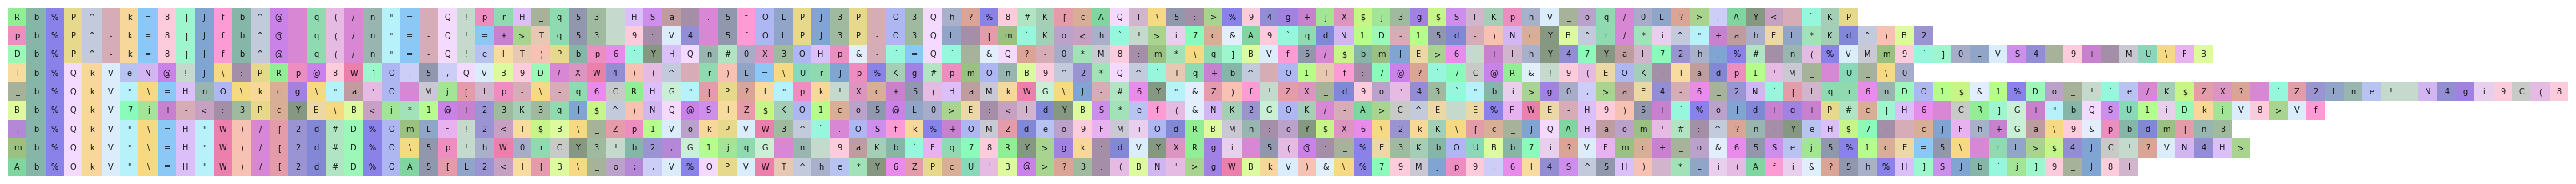

In [3]:
analysis.plot_msgs(eyeutil.msgs_eye_tri)

### Random Data

C:\Users\tombu\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tombu\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 155 (\x9b) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tombu\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tombu\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tombu\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 132 (\x84) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\tombu\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 140 (\x

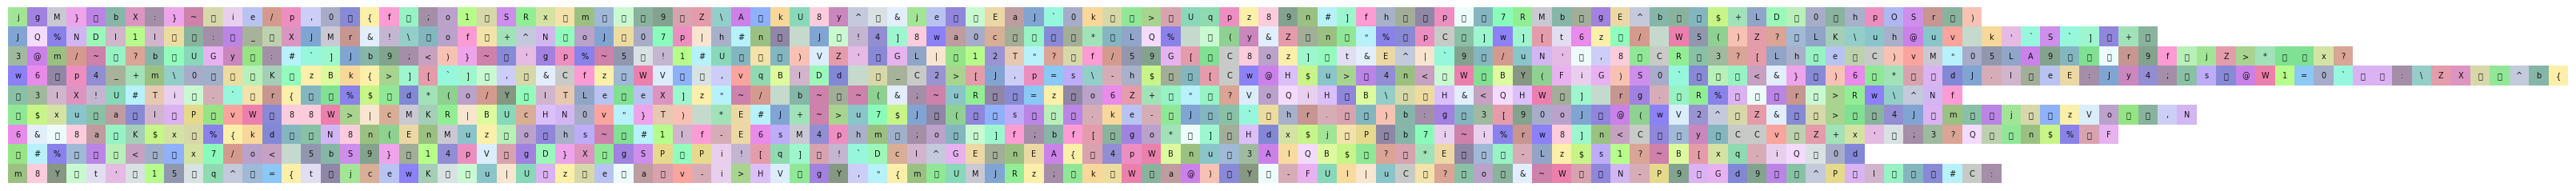

In [4]:
msgs_random, _ = eyeutil.generate_random_msgs_tri()
analysis.plot_msgs(msgs_random)

## 1.2. Shared Sections

Each message shown row by row.  
Matching trigrams labelled and shown.  
<br />
**Observation:** Large shared sections between eyeutil.msgs_eye_tri.  
**Observation:** The 1st letter differs in every message, but the 2nd is the same.  
**Key Takeaway:** Each message has to of been encoded by the same algorithm.  

### Eye Data

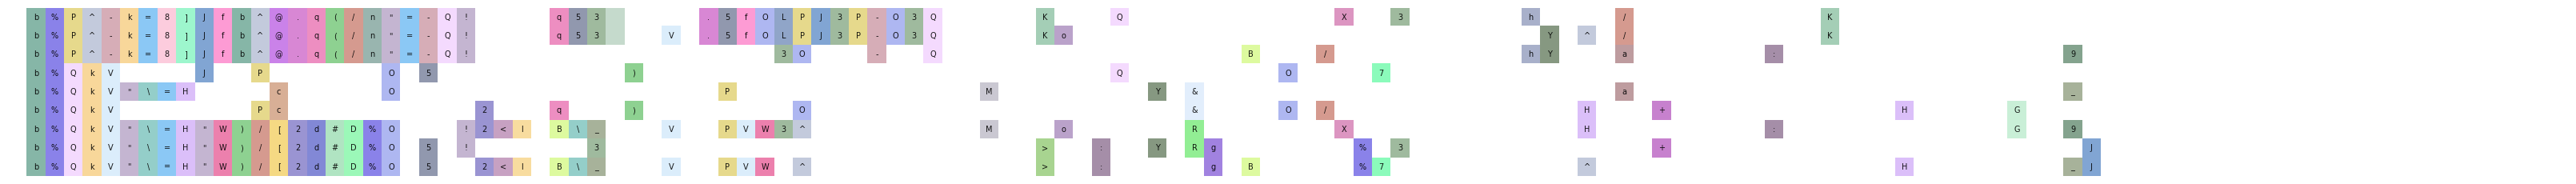

In [5]:
eyes_shared = analysis.calc_shared(eyeutil.msgs_eye_tri)
analysis.plot_im(eyes_shared, True)


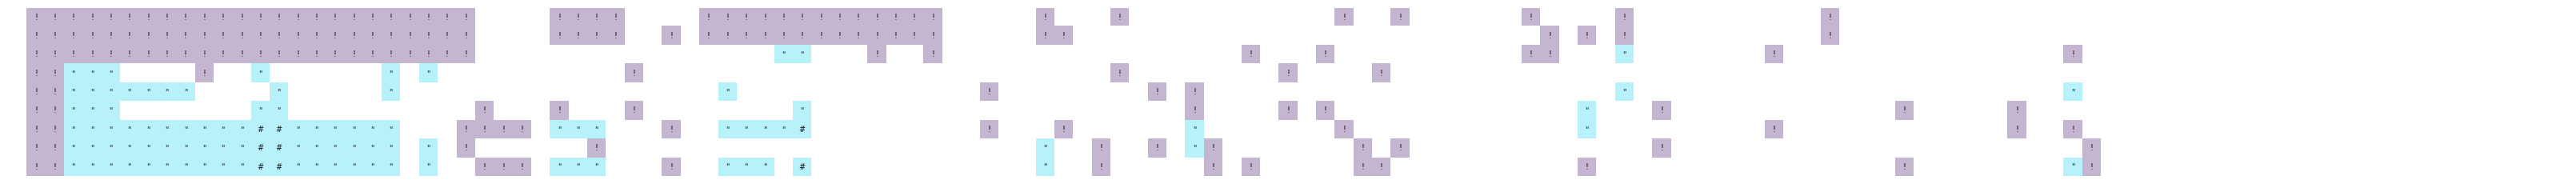

In [6]:
eyes_shared_unique = analysis.calc_shared_unique(eyeutil.msgs_eye_tri)
analysis.plot_im(eyes_shared_unique, True)

### Random Data

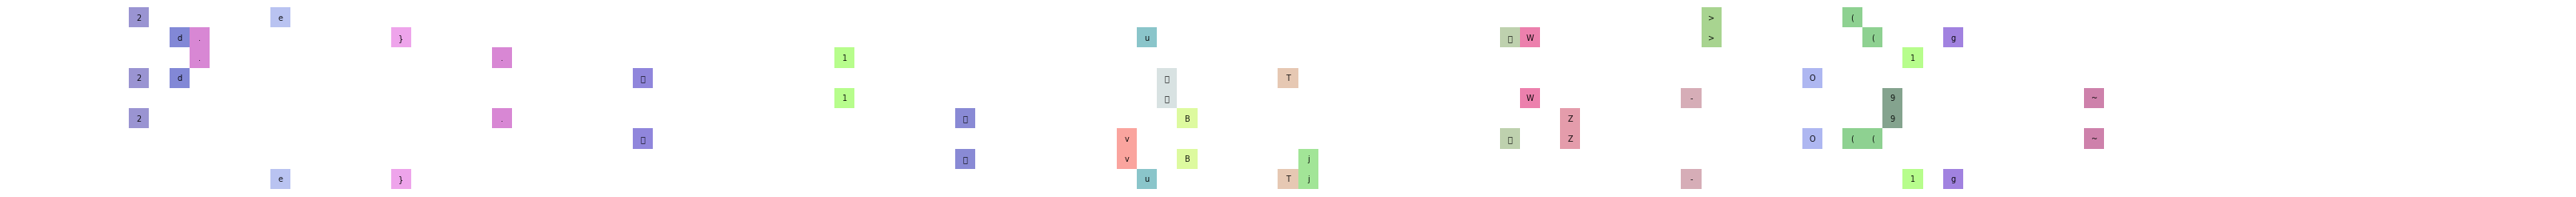

In [7]:
msgs_random, _ = eyeutil.generate_random_msgs_tri()
random_shared = analysis.calc_shared(msgs_random)
analysis.plot_im(random_shared, True)

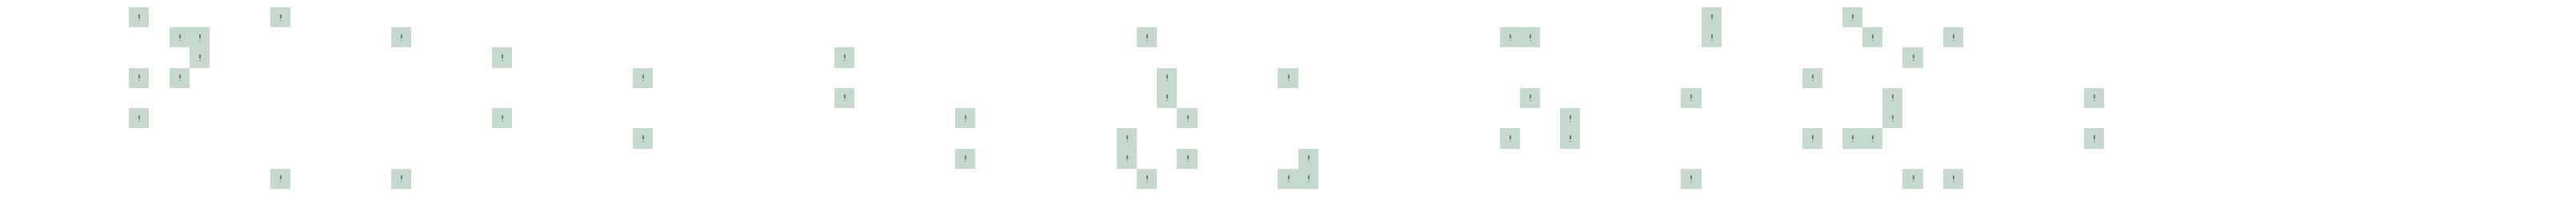

In [8]:
random_shared_unique = analysis.calc_shared_unique(msgs_random)
analysis.plot_im(random_shared_unique, True)

## 1.1. Reading Order (83)

`eyeutil.msgs_eye_tri` read as triplets of individual eyeutil.  
Data in `eyeutil.msgs_eye_triflat` by default is in 123123 format.  
6x6 grid represents each of the permutations of this reading order.  
<br />
**Observation:** Reading the eyes as trigrams with 123123 gives contiguous 0-82.  
**Key Takeaway:** No other reading order works the same amount.  

In [9]:
def plot_msgs_reading_orders(msgs_eye_triflat):
  perms = list(permutations([1, 2, 3]))
  fig, axs = plt.subplots(6, 6, figsize=(1, 1), dpi=850)

  counters = { }
  for x, p1 in enumerate(perms):
    for y, p2 in enumerate(perms):
      label = "".join([ str(a) for a in p1 + p2 ])

      counter = Counter()
      for message_raw in msgs_eye_triflat:
        parsed = [ eyeutil.conv_triflat_to_tri_ordered(v, p1) if i % 2 == 0 else eyeutil.conv_triflat_to_tri_ordered(v, p2) for i,v in enumerate(message_raw) ]
        counter.update(parsed)
      counters[label] = counter

      data_x = range(125)
      data_y = [counter[a] for a in data_x]
      axs[x, y].bar(data_x, data_y)
      axs[x, y].axis("off")
      axs[x, y].set_title(label, pad=-2, fontdict={ 'fontsize': 0.5 }, alpha=0.4, y=0.05)
  
  plt.show()
  return counters

def get_runs_from_labelled_freq(labelled_freq):
  for label in labelled_freq:
    runs = []
    current_run = None
    for i in range(0, 125):
    
      if labelled_freq[label][i] > 0:
        current_run = current_run or [i, i]
        current_run[1] = i

      elif current_run is not None:
        runs.append(current_run)
        current_run = None

    if current_run is not None:
        runs.append(current_run)

    print(f"{label} | Count: {len(labelled_freq[label])}, Runs: {runs}")

### Eye Data

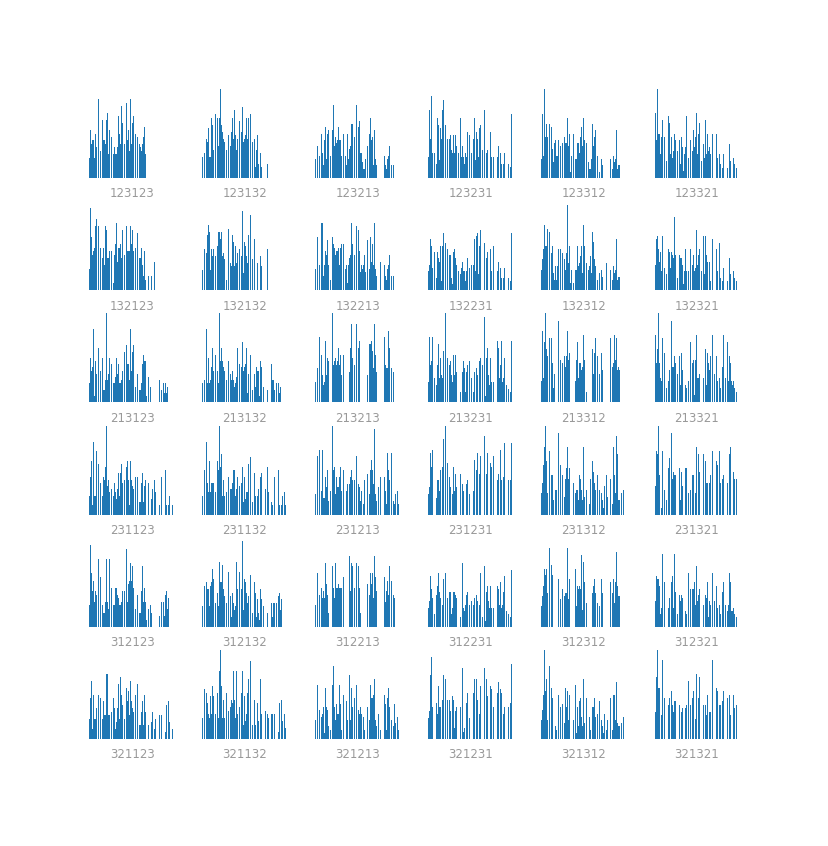

In [10]:
msgs_eye_tri_freq = plot_msgs_reading_orders(eyeutil.msgs_eye_triflat)

In [11]:
msgs_eye_tri_freq_sorted = { k: v for k, v in sorted(msgs_eye_tri_freq.items(), key=lambda item: len(item[1])) }
get_runs_from_labelled_freq(msgs_eye_tri_freq_sorted)

123123 | Count: 83, Runs: [[0, 82]]
132132 | Count: 83, Runs: [[0, 76], [80, 81], [85, 86], [90, 90], [95, 95]]
213213 | Count: 83, Runs: [[0, 19], [25, 42], [50, 64], [75, 89], [100, 114]]
231231 | Count: 83, Runs: [[0, 3], [5, 8], [10, 13], [15, 18], [20, 23], [25, 28], [30, 33], [35, 38], [40, 42], [45, 47], [50, 52], [55, 57], [60, 62], [65, 67], [70, 72], [75, 77], [80, 82], [85, 87], [90, 92], [95, 97], [100, 102], [105, 107], [110, 112], [115, 117], [120, 122]]
312312 | Count: 83, Runs: [[0, 16], [25, 41], [50, 66], [75, 90], [100, 115]]
321321 | Count: 83, Runs: [[0, 3], [5, 8], [10, 12], [15, 17], [20, 22], [25, 28], [30, 33], [35, 37], [40, 42], [45, 47], [50, 53], [55, 58], [60, 62], [65, 67], [70, 72], [75, 78], [80, 82], [85, 87], [90, 92], [95, 97], [100, 103], [105, 107], [110, 112], [115, 117], [120, 122]]
123132 | Count: 87, Runs: [[0, 82], [85, 86], [90, 90], [95, 95]]
132123 | Count: 87, Runs: [[0, 82], [85, 86], [90, 90], [95, 95]]
213312 | Count: 87, Runs: [[0, 19]

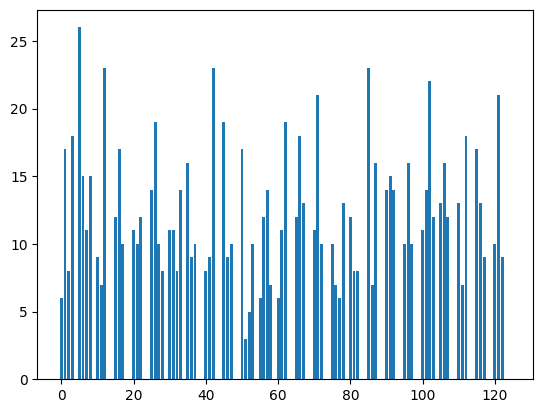

In [12]:
plt.bar(range(125), [msgs_eye_tri_freq["321321"][a] for a in range(125)])
plt.show()


### Random Data

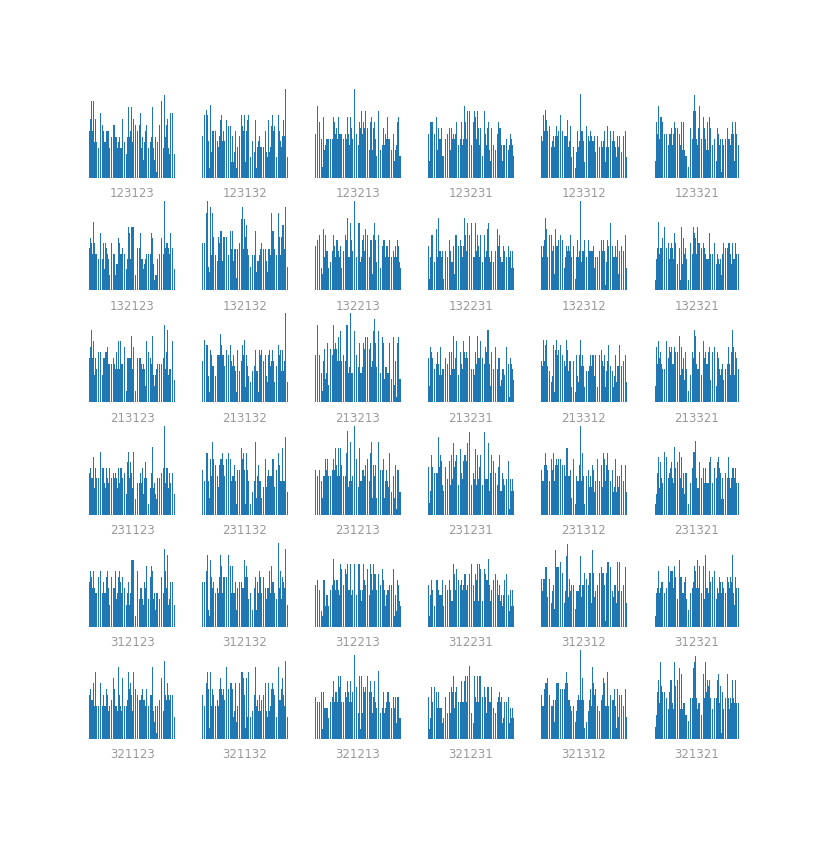

In [13]:
_, msgs_random_flat = eyeutil.generate_random_msgs_tri()
random_labelled_freq = plot_msgs_reading_orders(msgs_random_flat)

In [14]:
get_runs_from_labelled_freq(random_labelled_freq)

123123 | Count: 125, Runs: [[0, 124]]
123132 | Count: 125, Runs: [[0, 124]]
123213 | Count: 125, Runs: [[0, 124]]
123231 | Count: 125, Runs: [[0, 124]]
123312 | Count: 125, Runs: [[0, 124]]
123321 | Count: 125, Runs: [[0, 124]]
132123 | Count: 125, Runs: [[0, 124]]
132132 | Count: 125, Runs: [[0, 124]]
132213 | Count: 125, Runs: [[0, 124]]
132231 | Count: 125, Runs: [[0, 124]]
132312 | Count: 125, Runs: [[0, 124]]
132321 | Count: 125, Runs: [[0, 124]]
213123 | Count: 125, Runs: [[0, 124]]
213132 | Count: 125, Runs: [[0, 124]]
213213 | Count: 125, Runs: [[0, 124]]
213231 | Count: 125, Runs: [[0, 124]]
213312 | Count: 125, Runs: [[0, 124]]
213321 | Count: 125, Runs: [[0, 124]]
231123 | Count: 125, Runs: [[0, 124]]
231132 | Count: 125, Runs: [[0, 124]]
231213 | Count: 125, Runs: [[0, 124]]
231231 | Count: 125, Runs: [[0, 124]]
231312 | Count: 125, Runs: [[0, 124]]
231321 | Count: 125, Runs: [[0, 124]]
312123 | Count: 125, Runs: [[0, 124]]
312132 | Count: 125, Runs: [[0, 124]]
312213 | Cou

## 1.4. Prime Lengths

Lengths of each of the eyeutil.msgs_eye_tri.  
<br />
**Key Takeaway:** Cannot split eyeutil.msgs_eye_tri into sections.  

In [15]:
def print_prime_info(msgs_eye_tri):
  print("Length of msgs_eye_tri:")
  print("-------------------")
  for i in range(len(eyeutil.msgs_eye_tri)):
    l = len(eyeutil.msgs_eye_tri[i])
    print(f"{i}: {l}, prime: {analysis.calc_if_prime(l)}")

### Eye Data

In [16]:
print_prime_info(eyeutil.msgs_eye_tri)

Length of msgs_eye_tri:
-------------------
0: 99, prime: False
1: 103, prime: True
2: 118, prime: False
3: 102, prime: False
4: 137, prime: True
5: 124, prime: False
6: 119, prime: False
7: 120, prime: False
8: 114, prime: False


### Random Data

In [17]:
msgs_random, _ = eyeutil.generate_random_msgs_tri()
print_prime_info(msgs_random)

Length of msgs_eye_tri:
-------------------
0: 99, prime: False
1: 103, prime: True
2: 118, prime: False
3: 102, prime: False
4: 137, prime: True
5: 124, prime: False
6: 119, prime: False
7: 120, prime: False
8: 114, prime: False


## 1.5. Gaps and Isomorphs

Show the number of gaps of each length across each message.  
<br />
**Observation:** There are no consecutive letters.  
**Observation:** There are isomorphs visible from the gaps.  

### Eye Data

In [19]:
gap_im = analysis.calc_gaps(eyeutil.msgs_eye_tri, -1, False, False)
analysis.plot_im(gap_im, True, to_dull=True)
plt.show()

unique, counts = np.unique(gap_im, return_counts=True)
plt.bar(unique[1:11], counts[1:11])
plt.xticks(range(0, 10))
plt.show()

# Print out the gaps
for i in range(0, 10):
  print(f"{i}: {counts[i]}")

ValueError: max() iterable argument is empty

<Figure size 4000x500 with 0 Axes>

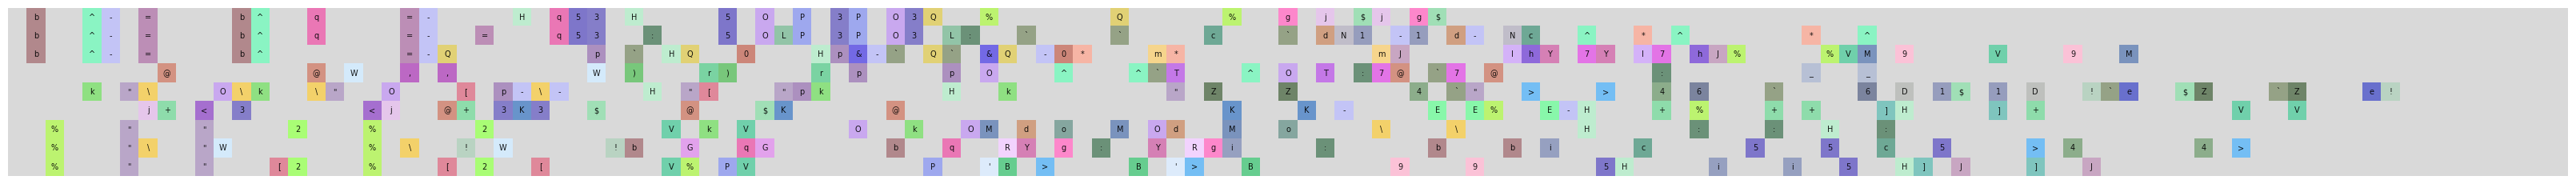

In [ ]:
small_gap_im = analysis.calc_gaps(eyeutil.msgs_eye_tri, 16, True, True)
analysis.plot_im(small_gap_im, True, True)

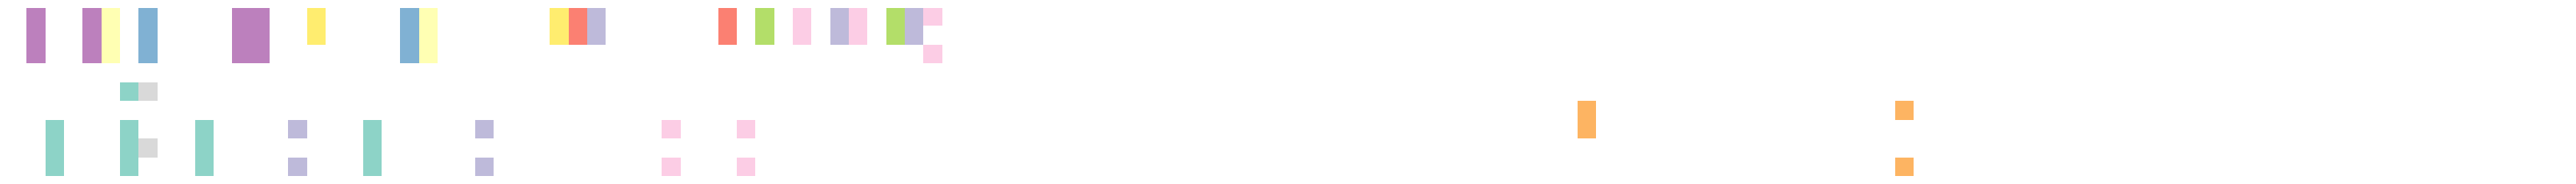

In [ ]:
small_gap_im_shared = analysis.calc_shared(small_gap_im)
analysis.plot_im(small_gap_im_shared)

### Random Data

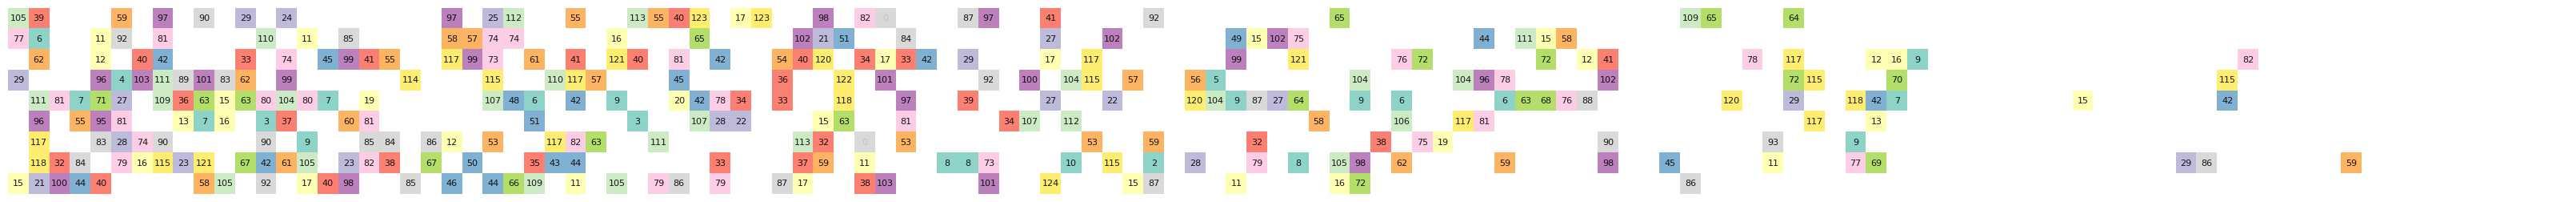

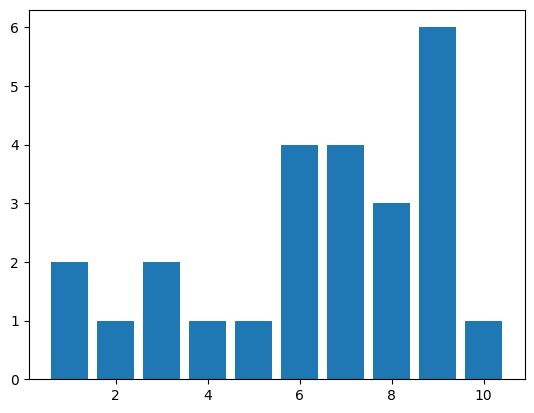

In [ ]:
msgs_random, _ = eyeutil.generate_random_msgs_tri()
random_gap_im = analysis.calc_gaps(msgs_random)
analysis.plot_im(random_gap_im, True)
plt.show()

random_unique, counts = np.unique(random_gap_im, return_counts=True)
plt.bar(unique[:10], counts[:10])
plt.show()

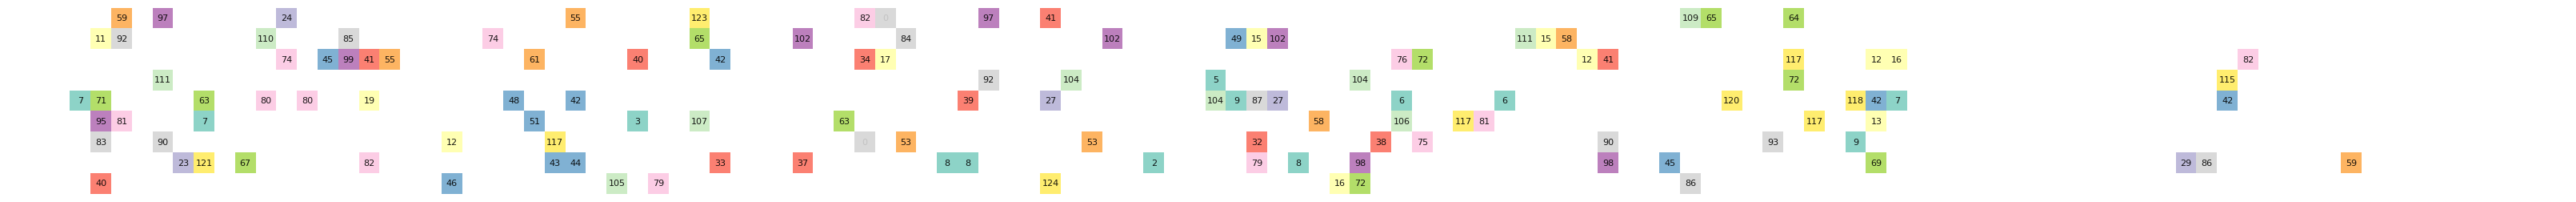

In [ ]:
random_small_gap_im = analysis.calc_gaps(msgs_random, 16, False, True)
analysis.plot_im(random_small_gap_im, True)